In [1]:
import cv2
import numpy as np

def detect_high_intensity_areas(image, threshold=20):
    # Create a mask with the same dimensions as the image
    mask = np.zeros(image.shape, dtype=np.uint8)
    
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect high intensity areas
    _, mask = cv2.threshold(image, mean_intensity + threshold, 255, cv2.THRESH_BINARY)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

# Load images in grayscale
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t5.jpg", 0)
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t7.jpg", 0)

# Detect high intensity areas
contours1 = detect_high_intensity_areas(img1)
# display_contours1 = cv2.resize(contours1, (1000, 1000))
contours2 = detect_high_intensity_areas(img2)
# display_contours2 = cv2.resize(contours2, (1000, 1000))

# Draw contours on the images
img1_with_contours = draw_contours(cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR), contours1)
img2_with_contours = draw_contours(cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR), contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_contours, (1000, 1000))

# Show images
cv2.imshow('Image 1 - High Intensity Areas', display_img1)
# cv2.imshow('contours1', display_contours1)
cv2.imshow('Image 2 - High Intensity Areas', display_img2)
# cv2.imshow('contours2', display_contours2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

def detect_high_intensity_areas(image, threshold=20):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect high intensity areas
    _, mask = cv2.threshold(image, mean_intensity + threshold, 255, cv2.THRESH_BINARY)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def detect_high_intensity_areas2(image, threshold=20):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect high intensity areas
    _, mask = cv2.threshold(image, mean_intensity + threshold, 150, cv2.THRESH_BINARY)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

def draw_contours2(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image


def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in grayscale
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t1.jpg", 0)
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t2.jpg", 0)

# Detect high intensity areas and mask them
contours1, mask1 = detect_high_intensity_areas(img1)
img1_masked = mask_detected_areas(img1, mask1)

contours2, mask2 = detect_high_intensity_areas(img2)
img2_masked = mask_detected_areas(img2, mask2)

# Detect new high intensity areas in the masked images
new_contours1, _ = detect_high_intensity_areas2(img1_masked)
new_contours2, _ = detect_high_intensity_areas2(img2_masked)

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours2(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours2(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

# Show images
cv2.imshow('Image 1 - High Intensity Areas', display_img1)
cv2.imshow('Image 2 - High Intensity Areas', display_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2
import numpy as np

def detect_low_intensity_areas(image, threshold=18):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect low intensity areas
    _, mask = cv2.threshold(image, mean_intensity - threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in grayscale
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t5.jpg", 0)
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t7.jpg", 0)

# Detect low intensity areas and mask them
contours1, mask1 = detect_low_intensity_areas(img1)
img1_masked = mask_detected_areas(img1, mask1)

contours2, mask2 = detect_low_intensity_areas(img2)
img2_masked = mask_detected_areas(img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas(img1_masked)
new_contours2, _ = detect_low_intensity_areas(img2_masked)

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

# display_cont = cv2.resize(img1_with_contours, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas', display_img2)

# cv2.imshow('display_cont 1 - Low Intensity Areas', img1_with_new_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
import cv2
import numpy as np

# Load the image in grayscale
img_path = "C:/Users/thiwa/vision/Grout/t5.jpg"
img = cv2.imread(img_path, 0)

# Resize the image for display
display_img = cv2.resize(img, (1000, 1000))

# Apply Gaussian blur to the image to reduce noise and improve circle detection
blurred_img = cv2.GaussianBlur(display_img, (9, 9), 2)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blurred_img, cv2.HOUGH_GRADIENT, dp=0.1, minDist=50, param1=60, param2=35, minRadius=250, maxRadius=550)

# circles = cv2.HoughCircles(blurred_img, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=10, param2=49, minRadius=70, maxRadius=300)

# circles = cv2.HoughCircles(blurred_img, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=10, param2=49, minRadius=70, maxRadius=300)

# If some circles are detected, convert the circle parameterqs (x, y, radius) to integers
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # Draw the circles on the image
    for (x, y, r) in circles:
        cv2.circle(display_img, (x, y), r, (0, 255, 0), 1)
        cv2.rectangle(display_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Create a window and set the mouse callback function to print intensity values on click
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Print the intensity value at the clicked point
        intensity = param[y, x]
        print(f"Intensity at ({x}, {y}): {intensity}")

        # Display the intensity value on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(display_img, str(intensity), (x, y), font, 0.5, (255, 255, 255), 2)
        cv2.imshow(window_name, display_img)

window_name = 'Detected Circles'
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, click_event, display_img)

# Display the image with detected circles
cv2.imshow(window_name, display_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Intensity at (778, 183): 182
Intensity at (753, 213): 149
Intensity at (731, 238): 158
Intensity at (719, 261): 161
Intensity at (695, 281): 166
Intensity at (676, 310): 176
Intensity at (668, 334): 175
Intensity at (921, 443): 182
Intensity at (884, 446): 153
Intensity at (850, 446): 157
Intensity at (808, 445): 164
Intensity at (764, 454): 176
Intensity at (738, 454): 178
Intensity at (656, 111): 194
Intensity at (639, 152): 151
Intensity at (620, 185): 162
Intensity at (614, 203): 166
Intensity at (602, 230): 170
Intensity at (587, 261): 180
Intensity at (526, 332): 170
Intensity at (513, 376): 180
Intensity at (491, 460): 175
Intensity at (581, 387): 179
Intensity at (628, 460): 172
Intensity at (597, 438): 173
Intensity at (553, 479): 170
Intensity at (525, 504): 168
Intensity at (658, 541): 175
Intensity at (614, 569): 176
Intensity at (581, 540): 176
Intensity at (546, 578): 177
Intensity at (345, 683): 204


In [26]:
import cv2
import numpy as np

def reduce_colors(image, k=5):
    # Convert the image to float32 and reshape it to a 2D array of pixels
    data = image.reshape((-1, 3)).astype(np.float32)
    
    # Define criteria for k-means (type, max_iter, epsilon)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Apply k-means clustering
    _, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert the centers to uint8 (since they are now the dominant colors)
    centers = np.uint8(centers)
    
    # Map the labels back to the corresponding center (dominant color)
    quantized_image = centers[labels.flatten()]
    
    # Reshape the quantized image back to the original image shape
    quantized_image = quantized_image.reshape(image.shape)
    
    return quantized_image

# Load the image in color
img_path = "C:/Users/thiwa/vision/Grout/t5.jpg"
img = cv2.imread(img_path)

# Reduce the color resolution of the image
k = 10  # Number of colors
quantized_img = reduce_colors(img, k)

# Resize the image for display
display_img = cv2.resize(quantized_img, (1000, 1000))

# Create a window and set the mouse callback function to print intensity values on click
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Print the intensity value at the clicked point
        intensity = param[y, x]
        print(f"Intensity at ({x}, {y}): {intensity}")

        # Display the intensity value on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(display_img, str(intensity), (x, y), font, 0.5, (255, 255, 255), 2)
        cv2.imshow(window_name, display_img)

window_name = 'Reduced Color Image'
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, click_event, quantized_img)

# Display the quantized image
cv2.imshow(window_name, display_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Intensity at (774, 239): [167 175 175]
Intensity at (752, 267): [167 175 175]
Intensity at (734, 297): [167 175 175]
Intensity at (717, 322): [167 175 175]
Intensity at (709, 343): [153 160 162]
Intensity at (704, 366): [158 166 167]
Intensity at (693, 387): [153 160 162]


In [27]:
#K mean

import numpy as np
import cv2 as cv

img1 = cv.imread('C:/Users/thiwa/vision/Grout/t5.jpg')
# img2 = cv.imread('C:/Users/thiwa/vision/Grout/t5.jpg')
K = 5

Z = img1.reshape((-1,3))
# y = img2.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)
# y = np.float32(y)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# rep,lala,centry=cv.kmeans(y,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img1.shape))

# center5 = np.uint8(centry)
# res5 = centry[lala.flatten()]
# res5 = rep.reshape((img2.shape))

display_img1 = cv.resize(res2, (1000, 1000))
# display_img2 = cv.resize(res5, (1000, 1000))

cv.imshow('display_img1',display_img1)
# cv.imshow('display_img2',display_img2)
cv.waitKey(0)
cv.destroyAllWindows()

In [154]:
#k mean then treshold

import cv2
import numpy as np

def reduce_colors(image, k=10):
    # Convert the image to float32 and reshape it to a 2D array of pixels
    data = image.reshape((-1, 3)).astype(np.float32)
    
    # Define criteria for k-means (type, max_iter, epsilon)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Apply k-means clustering
    _, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert the centers to uint8 (since they are now the dominant colors)
    centers = np.uint8(centers)
    
    # Map the labels back to the corresponding center (dominant color)
    quantized_image = centers[labels.flatten()]
    
    # Reshape the quantized image back to the original image shape
    quantized_image = quantized_image.reshape(image.shape)
    
    return quantized_image

def detect_low_intensity_areas(image, threshold=17):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect low intensity areas
    _, mask = cv2.threshold(image, mean_intensity - threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t6.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t7.jpg")

# Reduce the color resolution of the images
k = 8  # Number of colors
quantized_img1 = reduce_colors(img1, k)
quantized_img2 = reduce_colors(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Detect low intensity areas and mask them
contours1, mask1 = detect_low_intensity_areas(gray_img1)
img1_masked = mask_detected_areas(gray_img1, mask1)

contours2, mask2 = detect_low_intensity_areas(gray_img2)
img2_masked = mask_detected_areas(gray_img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas(img1_masked)
new_contours2, _ = detect_low_intensity_areas(img2_masked)

# Check if the number of marked ROIs is more than 200
if len(new_contours1) > 500:
    print("Image 1: More than 200 low intensity areas detected!")
if len(new_contours2) > 500:
    print("Image 2: More than 200 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas', display_img2)
cv2.imshow('Original Image 1', ori1)
cv2.imshow('Original Image 2', ori2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [128]:
#LUT(k mean) and treshold faster nah yeah not good 
import cv2
import numpy as np

def reduce_colors_fast(image, k=10):
    # Create a LUT with k evenly spaced colors
    palette = np.linspace(0, 255, k, dtype=np.uint8)
    # Create a LUT array
    lut = np.zeros((256, 1), dtype=np.uint8)
    for i in range(256):
        lut[i][0] = palette[i * k // 256]
    # Apply the LUT to each channel
    channels = cv2.split(image)
    quantized_channels = [cv2.LUT(channel, lut) for channel in channels]
    quantized_image = cv2.merge(quantized_channels) 
    return quantized_image

def detect_low_intensity_areas(image, threshold=20):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect low intensity areas
    _, mask = cv2.threshold(image, mean_intensity - threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t4.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t7.jpg")

# Reduce the color resolution of the images
k = 10  # Number of colors
quantized_img1 = reduce_colors_fast(img1, k)
quantized_img2 = reduce_colors_fast(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Detect low intensity areas and mask them
contours1, mask1 = detect_low_intensity_areas(gray_img1)
img1_masked = mask_detected_areas(gray_img1, mask1)

contours2, mask2 = detect_low_intensity_areas(gray_img2)
img2_masked = mask_detected_areas(gray_img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas(img1_masked)
new_contours2, _ = detect_low_intensity_areas(img2_masked)

# Check if the number of marked ROIs is more than 200
if len(new_contours1) > 1500:
    print("Image 1: More than 1000 low intensity areas detected!")
if len(new_contours2) > 1500:
    print("Image 2: More than 1000 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas', display_img2)
cv2.imshow('Original Image 1', ori1)
cv2.imshow('Original Image 2', ori2)
cv2.waitKey(0)
cv2.destroyAllWindows()



Image 1: More than 1000 low intensity areas detected!


In [153]:
#LUT show gussian

import cv2
import numpy as np

def reduce_colors_fast(image, k=10):
    # Create a LUT with k evenly spaced colors
    palette = np.linspace(0, 255, k, dtype=np.uint8)
    # Create a LUT array
    lut = np.zeros((256, 1), dtype=np.uint8)
    for i in range(256):
        lut[i][0] = palette[i * k // 256]
    # Apply the LUT to each channel
    channels = cv2.split(image)
    quantized_channels = [cv2.LUT(channel, lut) for channel in channels]
    quantized_image = cv2.merge(quantized_channels)
    return quantized_image

def detect_low_intensity_areas(image, threshold=75):
    # Calculate the mean intensity of the image
    mean_intensity = np.mean(image)
    
    # Thresholding to detect low intensity areas
    _, mask = cv2.threshold(image, mean_intensity - threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t8.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t12.jpg")

# Reduce the color resolution of the images
k = 13  # Number of colors
quantized_img1 = reduce_colors_fast(img1, k)
quantized_img2 = reduce_colors_fast(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Apply adaptive Gaussian thresholding
adaptive_thresh1 = cv2.adaptiveThreshold(gray_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)
adaptive_thresh2 = cv2.adaptiveThreshold(gray_img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)

# Detect low intensity areas and mask them
contours1, mask1 = detect_low_intensity_areas(adaptive_thresh1)
img1_masked = mask_detected_areas(adaptive_thresh1, mask1)

contours2, mask2 = detect_low_intensity_areas(adaptive_thresh2)
img2_masked = mask_detected_areas(adaptive_thresh2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas(img1_masked)
new_contours2, _ = detect_low_intensity_areas(img2_masked)

# Check if the number of marked ROIs is more than 1500
if len(new_contours1) > 1500:
    print("Image 1: More than 1500 low intensity areas detected!")
if len(new_contours2) > 1500:
    print("Image 2: More than 1500 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

adth1 = cv2.resize(adaptive_thresh1, (1000, 1000))
adth2 = cv2.resize(adaptive_thresh2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas', display_img2)
# cv2.imshow('Original Image 1', ori1)
# cv2.imshow('Original Image 2', ori2)

cv2.imshow('Adaptive Threshold Image 1', adth1)
cv2.imshow('Adaptive Threshold Image 2', adth2)
cv2.waitKey(0)
cv2.destroyAllWindows()


Image 1: More than 1500 low intensity areas detected!
Image 2: More than 1500 low intensity areas detected!


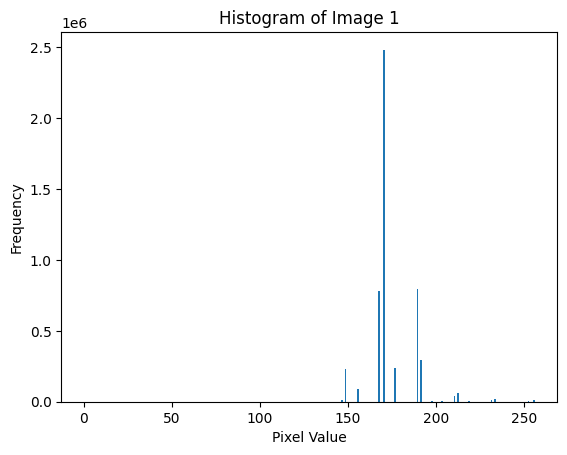

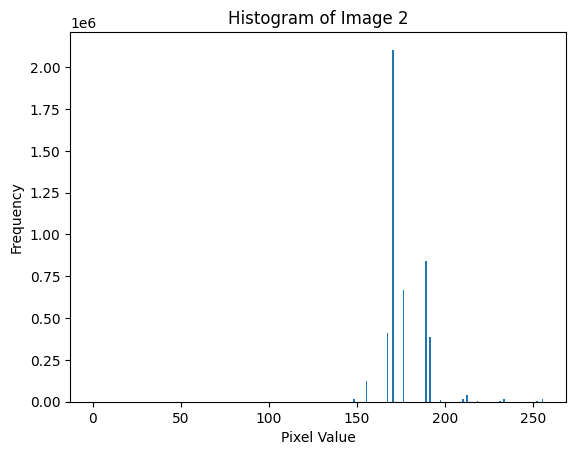

Image 2: More than 200 low intensity areas detected!


In [70]:
#otsu tresholding
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_colors_fast(image, k=10):
    # Create a LUT with k evenly spaced colors
    palette = np.linspace(0, 255, k, dtype=np.uint8)
    # Create a LUT array
    lut = np.zeros((256, 1), dtype=np.uint8)
    for i in range(256):
        lut[i][0] = palette[i * k // 256]
    # Apply the LUT to each channel
    channels = cv2.split(image)
    quantized_channels = [cv2.LUT(channel, lut) for channel in channels]
    quantized_image = cv2.merge(quantized_channels)
    return quantized_image

def detect_low_intensity_areas_otsu(image):
    # Apply Gaussian Blur to reduce noise before thresholding
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply Otsu's thresholding
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

def plot_histogram(image, title):
    plt.figure()
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t5.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t7.jpg")

# Reduce the color resolution of the images
k = 13  # Number of colors
quantized_img1 = reduce_colors_fast(img1, k)
quantized_img2 = reduce_colors_fast(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Plot histogram of the grayscale images
plot_histogram(gray_img1, 'Histogram of Image 1')
plot_histogram(gray_img2, 'Histogram of Image 2')

# Detect low intensity areas and mask them using Otsu's thresholding
contours1, mask1 = detect_low_intensity_areas_otsu(gray_img1)
img1_masked = mask_detected_areas(gray_img1, mask1)

contours2, mask2 = detect_low_intensity_areas_otsu(gray_img2)
img2_masked = mask_detected_areas(gray_img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas_otsu(img1_masked)
new_contours2, _ = detect_low_intensity_areas_otsu(img2_masked)

# Check if the number of marked ROIs is more than 200
if len(new_contours1) > 200:
    print("Image 1: More than 200 low intensity areas detected!")
if len(new_contours2) > 200:
    print("Image 2: More than 200 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas (Otsu)', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas (Otsu)', display_img2)

# cv2.imshow('Original Image 1', ori1)
# cv2.imshow('Original Image 2', ori2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [46]:
#adaptive mean tresholding

import cv2
import numpy as np

def reduce_colors_fast(image, k=10):
    # Create a LUT with k evenly spaced colors
    palette = np.linspace(0, 255, k, dtype=np.uint8)
    # Create a LUT array
    lut = np.zeros((256, 1), dtype=np.uint8)
    for i in range(256):
        lut[i][0] = palette[i * k // 256]
    # Apply the LUT to each channel
    channels = cv2.split(image)
    quantized_channels = [cv2.LUT(channel, lut) for channel in channels]
    quantized_image = cv2.merge(quantized_channels)
    return quantized_image

def detect_low_intensity_areas_adaptive_mean(image):
    # Apply adaptive mean thresholding
    mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 25)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t12.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t13.jpg")

# Reduce the color resolution of the images
k = 10  # Number of colors
quantized_img1 = reduce_colors_fast(img1, k)
quantized_img2 = reduce_colors_fast(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Detect low intensity areas and mask them using adaptive mean thresholding
contours1, mask1 = detect_low_intensity_areas_adaptive_mean(gray_img1)
img1_masked = mask_detected_areas(gray_img1, mask1)

contours2, mask2 = detect_low_intensity_areas_adaptive_mean(gray_img2)
img2_masked = mask_detected_areas(gray_img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas_adaptive_mean(img1_masked)
new_contours2, _ = detect_low_intensity_areas_adaptive_mean(img2_masked)

# Check if the number of marked ROIs is more than 200
if len(new_contours1) > 200:
    print("Image 1: More than 200 low intensity areas detected!")
if len(new_contours2) > 200:
    print("Image 2: More than 200 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas (Adaptive Mean)', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas (Adaptive Mean)', display_img2)
# cv2.imshow('Original Image 1', ori1)
# cv2.imshow('Original Image 2', ori2)
cv2.waitKey(0)
cv2.destroyAllWindows()


Image 1: More than 200 low intensity areas detected!
Image 2: More than 200 low intensity areas detected!


In [47]:
#adaptive gussian tresholding

import cv2
import numpy as np

def reduce_colors_fast(image, k=10):
    # Create a LUT with k evenly spaced colors
    palette = np.linspace(0, 255, k, dtype=np.uint8)
    # Create a LUT array
    lut = np.zeros((256, 1), dtype=np.uint8)
    for i in range(256):
        lut[i][0] = palette[i * k // 256]
    # Apply the LUT to each channel
    channels = cv2.split(image)
    quantized_channels = [cv2.LUT(channel, lut) for channel in channels]
    quantized_image = cv2.merge(quantized_channels)
    return quantized_image

def detect_low_intensity_areas_adaptive_gaussian(image):
    # Apply adaptive Gaussian thresholding
    mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours, mask

def draw_contours(image, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return image

def mask_detected_areas(image, mask):
    # Apply the mask to the image to ignore detected areas
    masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return masked_image

# Load images in color
img1 = cv2.imread("C:/Users/thiwa/vision/Grout/t12.jpg")
img2 = cv2.imread("C:/Users/thiwa/vision/Grout/t13.jpg")

# Reduce the color resolution of the images
k = 10  # Number of colors
quantized_img1 = reduce_colors_fast(img1, k)
quantized_img2 = reduce_colors_fast(img2, k)

# Convert the quantized images to grayscale
gray_img1 = cv2.cvtColor(quantized_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(quantized_img2, cv2.COLOR_BGR2GRAY)

# Detect low intensity areas and mask them using adaptive Gaussian thresholding
contours1, mask1 = detect_low_intensity_areas_adaptive_gaussian(gray_img1)
img1_masked = mask_detected_areas(gray_img1, mask1)

contours2, mask2 = detect_low_intensity_areas_adaptive_gaussian(gray_img2)
img2_masked = mask_detected_areas(gray_img2, mask2)

# Detect new low intensity areas in the masked images
new_contours1, _ = detect_low_intensity_areas_adaptive_gaussian(img1_masked)
new_contours2, _ = detect_low_intensity_areas_adaptive_gaussian(img2_masked)

# Check if the number of marked ROIs is more than 200
if len(new_contours1) > 200:
    print("Image 1: More than 200 low intensity areas detected!")
if len(new_contours2) > 200:
    print("Image 2: More than 200 low intensity areas detected!")

# Draw contours on the original images
img1_with_contours = draw_contours(cv2.cvtColor(gray_img1, cv2.COLOR_GRAY2BGR), contours1)
img1_with_new_contours = draw_contours(img1_with_contours, new_contours1)

img2_with_contours = draw_contours(cv2.cvtColor(gray_img2, cv2.COLOR_GRAY2BGR), contours2)
img2_with_new_contours = draw_contours(img2_with_contours, new_contours2)

# Resize images for display
display_img1 = cv2.resize(img1_with_new_contours, (1000, 1000))
display_img2 = cv2.resize(img2_with_new_contours, (1000, 1000))

ori1 = cv2.resize(img1, (1000, 1000))
ori2 = cv2.resize(img2, (1000, 1000))

# Show images
cv2.imshow('Image 1 - Low Intensity Areas (Adaptive Gaussian)', display_img1)
cv2.imshow('Image 2 - Low Intensity Areas (Adaptive Gaussian)', display_img2)
cv2.imshow('Original Image 1', ori1)
cv2.imshow('Original Image 2', ori2)
cv2.waitKey(0)
cv2.destroyAllWindows()


Image 1: More than 200 low intensity areas detected!
Image 2: More than 200 low intensity areas detected!
